In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
targets = np.genfromtxt('gaia-no-brewer-northern.csv', delimiter=',', names=True, dtype=None, encoding=None)

In [3]:
vmags = targets['Gmag'] + 0.5

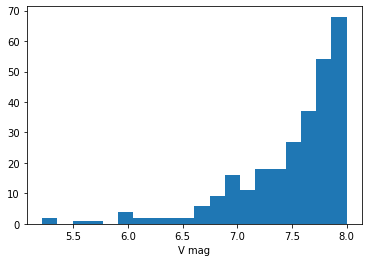

In [4]:
plt.hist(vmags, bins=20)
plt.xlabel('V mag');

Calculate a scaling factor on the exposure time.
We use the fact that the flux of a star with magnitude $8$ compared to a star of magnitude $x$ is a factor of $10^{0.4(x - 8)}$ brighter:

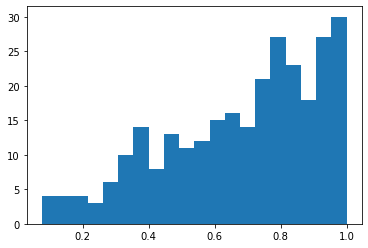

In [5]:
flux_scaling = 10.**(0.4 * (vmags - 8.0))
plt.hist(flux_scaling, bins=20);

Because all the stars in our sample are brighter than $V = 8$ by construction, they will all require some fraction $<1$ of the time it would take to observe a star of exactly $V = 8$.

Plus the standard stars to be observed by all instruments (these are selected to be bright so they'll be quick):

In [6]:
standards = np.genfromtxt('gaia-brewer-overlap-standards.csv', delimiter=',', names=True, dtype=None, encoding=None)

In [7]:
flux_scaling_standards = 10.**(0.4 * (standards['Gmag'] + 0.5 - 8.0))

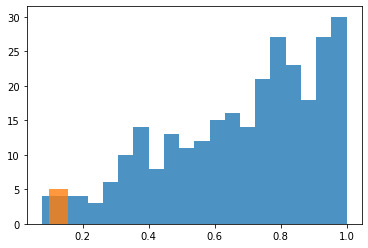

In [8]:
flux_scaling = 10.**(0.4 * (vmags - 8.0))
plt.hist(flux_scaling, bins=20, alpha=0.8)
plt.hist(flux_scaling_standards, bins=2, alpha=0.8);

#### FIES time:

Select a randomized subset of 1/3rd of the target list:

In [9]:
np.random.shuffle(flux_scaling)
N = len(targets)
subset = flux_scaling[0:int(N/3)]

In [10]:
subset = np.append(subset, subset) # we want two observations per star so double the list
subset = np.append(subset, flux_scaling_standards) # just one obs of each standard star

Calculate the required integration time:

In [11]:
v8_exptime = 30. * 60. # seconds to get to SNR ~ 200 at 600nm for V=8
total_exptime = np.sum(v8_exptime * subset)

Add on overheads for readout + slew:

In [12]:
readout_time = 150. # CHECK THIS
slew_time = 120. # ???
total_time = total_exptime + len(subset) * (readout_time + slew_time)

In [13]:
print("time required is {0:.2f} hours or {1:.1f} 8-hour nights".format(total_time/3600., total_time/3600./8.))

time required is 78.74 hours or 9.8 8-hour nights


#### HARPS-N time:

In [14]:
subset = flux_scaling[int(N/3):2*int(N/3)]
subset = np.append(subset, subset) # we want two observations per star so double the list
subset = np.append(subset, flux_scaling_standards)

In [15]:
v8_exptime = 15. * 60. # seconds to get to SNR ~ 200 at 600nm for V=8
total_exptime = np.sum(v8_exptime * subset)

In [16]:
readout_time = 150.
slew_time = 120. # ???
total_time = total_exptime + len(subset) * (readout_time + slew_time)

In [17]:
print("time required is {0:.2f} hours or {1:.1f} 8-hour nights".format(total_time/3600., total_time/3600./8.))

time required is 47.44 hours or 5.9 8-hour nights


#### HERMES time:

(Note that due to rounding in the 1/3rd sample, HERMES might get 1-2 more targets than the other spectrographs)

In [18]:
subset = flux_scaling[2*int(N/3):]
subset = np.append(subset, subset) # we want two observations per star so double the list
subset = np.append(subset, flux_scaling_standards)

In [19]:
v8_exptime = 25. * 60. # seconds to get to SNR ~ 200 at 600nm for V=8
total_exptime = np.sum(v8_exptime * subset)

In [20]:
readout_time = 150. # CHECK THIS
slew_time = 120. # ???
total_time = total_exptime + len(subset) * (readout_time + slew_time)

In [21]:
print("time required is {0:.2f} hours or {1:.1f} 8-hour nights".format(total_time/3600., total_time/3600./8.))

time required is 67.49 hours or 8.4 8-hour nights
